## Practical part:  

This project is implemented in consideration of Lecturerer Khaw´s explanation and the machine learning with python cookbook. 

 The goal is to compare between KNN and Decision Tree, to know which one is better with iris dataset.
 

### Step 1: Loading Data from CSV file: - 

We need to get the data into our system. There are various ways to do it depending on the dataset type. Our dataset is a CSV file: there are multiple ways that can be used to load data into the python ecosystem. However, the panda's library will be the used one as implemented in the lecture and the book. because it creates data frames for the data in a tabular format like spreadsheets. We will go through the following two steps to do that. 


a. Getting the document from its directory on the local host. (The slash should be changed to avoid errors) 



b. Loading it using pandas with the dataset file exact name. 



load csv file.

In [1]:
cd C:/Users/Shaymaa Hamad/Desktop/pythonProject1

C:\Users\Shaymaa Hamad\Desktop\pythonProject1


In [2]:
import pandas as pd
iris = pd.read_csv('iris.csv')

### Step 2: Data preprocessing: - 

Data preprocessing is turning raw data into clean data that can be used for the machine learning model. Usually, the first step is considered a step from the preprocessing, but we decided to separate to shorten the length of this step to be more appealing to the reader and to focus on the core steps.  

In machine learning, __Data wrangling__ is only one step in preprocessing the data, an important one. Data frames are the data structure that is used for data wrangling because data frames are tabular just like spreadsheets, they are based on rows and columns. Let me show you the tables we have loaded. 

__a. Showing the Data Frame__

In [3]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


We can see that we have 6 columns and that the width and length are of the same unit which is centimeters (CM). The dataset has about 150 rows. For now, we can see two types of flower species. We need to explore the data to understand it better. 

__b. About the Data / Exploring the data:__

Using describe and info methods, we are going to understand the data inside our dataset in a deeper level and more holistic view. 

Starting with the function gives us summary statistics, so it is logical to not include species column that is already of type string. 

In [5]:
iris.shape

(150, 6)

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can conclude a lot of things, one of them is that the average length and width of the sepal is larger than the petal. We can see clearly the min, max, mean, and standard deviation of each row. However, this function is not always right, for example, it already treated ID column as a numerical value and gave us a numerical statistical summary of it which is not practical. So, we could navigate the data and use info methods for a better understanding of the data. 

Moving on, the info method gives us more information about the data itself. 

Let´s see more information about the data

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Here, the number of columns, rows, and index are clear (6, 150, 0 to 149). Columns names and indexes then the datatypes are mentioned. The datatypes are great, but we are going to change one of them later due to using KNN that only accepts numerical values and there are no missing values (no need to use isnull or replace np.nan). 

Since we have formulated a respectful overview of the data, it is time to dive deep and build the background needed for a smooth implementation of machine learning models. 


__c. Finding unique values__

The project objective is pretty clear, which is to know what the species of the flower is. Accordingly, our target is the Species column. Let´s explore this column. 

How many species of this flower do we have? To answer that depends on the iris data provided. We used functions/methods to know the number of unique values in this column and then as long as there is little, we could explore their names. 

In [8]:
iris['Species'].nunique()

3

Since the unique values are just three , let´s see them.

In [9]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have just three types of the flower.

So, it is proved that this dataset will achieve the objective and we verified that the data has the three species which are Iris-setosa, Iris-versicolor, Iris-virginica.  

__d. Handling Duplicates__  

In [10]:
print('Number of rows in iris: ', len(iris))
print('Number of rows in iris after removing deuplicates:', len(iris.drop_duplicates()))

Number of rows in iris:  150
Number of rows in iris after removing deuplicates: 150


__e. Renaming columns for cleaner view__

Let´s get ride of the Cm in each column name and make more understandable

In [11]:
iris.rename(columns={'SepalLengthCm': 'Sepal_Length',
                     'SepalWidthCm':'Sepal_Width', 
                     'PetalLengthCm': 'Petal_Length', 
                     'PetalWidthCm':'Petal_Width'}, inplace = True)

In [12]:
iris.head(2)

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


Although, it is recommended in the book to not use inplace, as it edits the data directly and the data should be immutable. Here, to be able to use those new names later. 

## Handling Numerical Data



Detecting outliers: There are two ways to detect outliers EllipticEnvelope and IQR-based detection. Since the first one needs to set the contamination, we won´t use it as we lack the experience and judgment to successfully set it. However, we are going to use IQR, so instead of looking at the observation, we focus on individual features and identify the extreme values. 

In [13]:
import numpy as np

#create ine feature
feature = iris.iloc[:,1] #sepal length

# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)


(array([], dtype=int64),)

The code did not recognize the column or evaluate the outliers in it.  That´s why we are going to visualize the boxplot. 

Let´s visualize the outliers in sepal length using boxplot: 

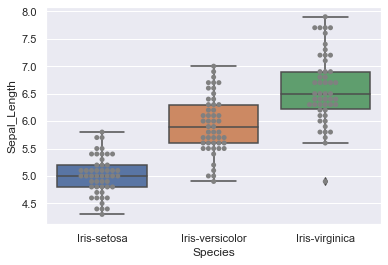

In [14]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Usual boxplot
ax = sns.boxplot(x='Species', y='Sepal_Length', data=iris)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x='Species', y='Sepal_Length', data=iris, color="grey")
plt.show()

There is one outlier here, which is the point below the boxplot of the iris-virgincia. 

In [15]:
import numpy as np

feature = iris.iloc[:,2] #sepal width
# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)

(array([15, 32, 33, 60], dtype=int64),)

In [16]:
iris.loc[[15,32,33,60], 'Sepal_Width']

15    4.4
32    4.1
33    4.2
60    2.0
Name: Sepal_Width, dtype: float64

As shown above, the outliers are three values above 4 and one value of 2. 

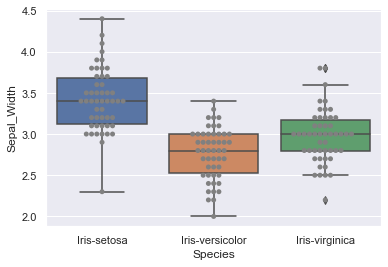

In [17]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Usual boxplot
ax = sns.boxplot(x='Species', y='Sepal_Width', data=iris)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x='Species', y='Sepal_Width', data=iris, color="grey")
plt.show()

In [18]:
feature = iris.iloc[:,3] #Petal_Length

# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)

(array([], dtype=int64),)

Just like the first code, the output is quite concerning. However, the boxplot shows the outliers. But with all the dots the graph is crowded, so we decided to remove marks or dots and only show the outliers dots. 

<AxesSubplot:xlabel='Species', ylabel='Petal_Length'>

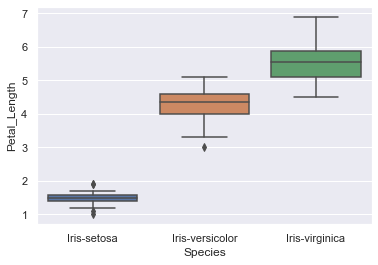

In [19]:
import seaborn as sns
sns.boxplot( x=iris["Species"], y=iris["Petal_Length"] )

As shown here, we have one outlier in Iris-versicolor. 

This is the last feature, as with the previous one, nothing from the code, so, we referred to the boxplot. 

In [20]:
import numpy as np
feature = iris.iloc[:,4] #Petal_Width

# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)

(array([], dtype=int64),)

<AxesSubplot:xlabel='Species', ylabel='Petal_Width'>

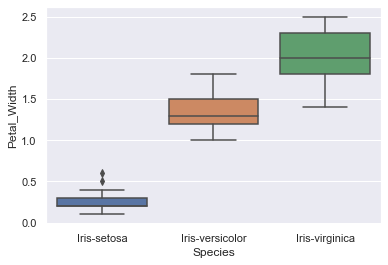

In [21]:
import seaborn as sns
sns.boxplot( x=iris["Species"], y=iris["Petal_Width"] )

The outliers here are two in iris-setosa. 

In total, the outliers’ numbers are 8 out of 150 observations. 

Since the outliers are about 5%, it is okay to keep them, as they are insignificant. 

### Handling Categroical data


In [22]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Since each class of the three classes has the same number of instances or rows, then this data is balanced. We need data to be balanced for the machine learning model predictions to be accurate as much as possible. 

## Feature selection
Dimensionality reduction using feature extraction or feature selection depends on the main goal. And our goal is to maintain the original features that´s why we have implemented dimensionality reduction.  

We have implemented various approaches to make sure we have selected the right features. 


__a. Feature selection using thresholding numerical feature variance:__

Variance thresholding (VT) is the most basic approach; We had to make sure that the unit is CM in all features because the variance is not centered as it is squared, so this approach could work. However, there is a limitation, we had to set the variance threshold manually, we have searched and found most of the ML engineers use 0.5 with iris dataset.

In [23]:
iris.head(1)

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [24]:
from sklearn.feature_selection import VarianceThreshold

#Create features and target
features = iris.iloc[:,[1,2,3,4]].values
target = iris.iloc[:,5].values

# Create thresholder
thresholder = VarianceThreshold(threshold=.5)

# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features)
# View high variance feature matrix
features_high_variance[0:3]

# View variances
thresholder.fit(features).variances_




array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

After all, it is about removing features with the lowest variance (i.e., likely containing little information) which is sepal width here. 

__b. Removing Irrelevant Features for Classification:__

Next, since we have a categorical target, we will remove irrelevant features for classification but not using chi.squared as it needs to change the features and even needs us to set the features number in k parameter, same as when we use ANOVA but it is used with quantitative features.  

So, we decided to use SelectPercentile to select the top n percent of features (we could have conducted recursive feature elimination (REF) and the result was the same) which is 3 features. Then, we used ANOVA and set k parameter to be the top number. Finally, we used sklearn SelectKBest model to select the best 3 features.  

In [25]:
# Load library
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)
# Show results
print("Best number of features:", features_kbest.shape[1])


Best number of features: 3


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Convert to categorical data by converting data to integers
features = features.astype(int)
# Select two features with highest chi-squared statistics
bestfeatures = SelectKBest(score_func=f_classif, k=3)
iris_trim = bestfeatures.fit_transform(features, target)

print(bestfeatures.scores_)
print(bestfeatures.pvalues_)
print(iris_trim.shape)


[  81.19715    33.715004 1160.0116    385.483   ]
[1.7586086e-24 8.8784123e-13 0.0000000e+00 0.0000000e+00]
(150, 3)


Since all 4 features are continuous and we use F-test to do this. As you can see it has the least score and the largest p-value. So, we decided to remove the 'Sepal_Width' feature. 

In [27]:
iris.drop(['Sepal_Width'], axis=1, inplace=True)

## Step 4: ML model implementation: 

We are going to implement both KNN and Decision Tree. 

Since we have already imported the data and defined or created the features and target. Accordingly, here we are going to start with splitting the data.

__a. Data splitting__

According to a recent conference paper published by Ismail in Feb 2022, the splitting of the dataset is determined by the size of it and according to most scholars 70/30 (70% for training set and 30% for testing set) for small dataset between 100 and 1000000. Consequently, we are going to split our data into 70/30.

In [28]:
iris.head(1)

,Id,Sepal_Length,Petal_Length,Petal_Width,Species
0,1,5.1,1.4,0.2,Iris-setosa


In [29]:
#Create features and target
X = iris.iloc[:,[1,2,3]].values
y = iris.iloc[:,4].values

#splitting the dataset into 70 training set and 30 test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


__b. Feature scaling or standardization__

Standardizing a Feature is transforming it to have a mean of 0 and a standard deviation of 1. Standardization is a common scaling method for machine learning preprocessing. As recommended in our textbook, it is recommended to default it. So, we have used standardization as our scaling method. 

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

__c. Training the selected models__ 

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

#using looping or python looping to find the best K value for this dataset
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
scores

{1: 0.9777777777777777,
 2: 0.9777777777777777,
 3: 0.9777777777777777,
 4: 0.9555555555555556,
 5: 0.9777777777777777,
 6: 0.9555555555555556,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777,
 10: 0.9555555555555556,
 11: 1.0,
 12: 1.0,
 13: 0.9777777777777777,
 14: 0.9555555555555556,
 15: 0.9777777777777777,
 16: 0.9777777777777777,
 17: 0.9777777777777777,
 18: 0.9777777777777777,
 19: 0.9777777777777777,
 20: 0.9777777777777777,
 21: 0.9777777777777777,
 22: 0.9555555555555556,
 23: 0.9777777777777777,
 24: 0.9555555555555556,
 25: 0.9555555555555556}

Text(0, 0.5, 'Testing Accuracy')

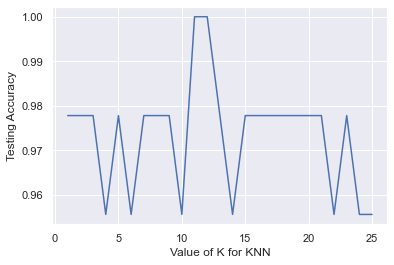

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

#Visualising the relationship between k and testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


We can conclude that the highest accuracy score was 0.97 and the smallest k_value that it got was 3. So, the k_value is 3. 

In [33]:
# choosing 3 as k_value
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

we need to check our trianing data accuracy to be able to detect over fitting , if there is any!

In [34]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

x_pred = classifier.predict(X_train)
train_accuracy = metrics.classification_report(y_train, x_pred)
print(train_accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       0.91      0.94      0.92        32
 Iris-virginica       0.95      0.92      0.94        39

       accuracy                           0.95       105
      macro avg       0.95      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



 

The model has been implemented and predicted the test dataset; it is now ready to be evaluated. It is going to be evaluated in the next step (step 5). 

In [36]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Decison tree

In [37]:
from sklearn.tree import DecisionTreeClassifier 
# Decision tree classifier
SpeciesTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
SpeciesTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
predTree = SpeciesTree.predict(X_test)
print(predTree [0:5])
print(y_test[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predTree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Model Evaluation

Model evaluation for KNN and DT classifiers will be used as the base to compare 
between the two models.
The KNN accuracy and other performance matrix are at the maximum, which is 1.
So, we suspected that may be there is an overfitting case. Since the test dataset accuracy is 100% and train dataset accuracy is 95%.

The DT accuracy is about 95%. Which is lower than KNN accuracy.

Until now we have presented the classification report that has measured the accuracy of the models depending on the test dataset. However, we want to evaluate how well each model will work in real life.



Simply, We have already presented teh classification report that has measured the accuracy of the models depending on the test dataset. However, we want to evaluate how well each model will work in real life.

The way we evaluated our supervised machine learning models(KNN and Decsion Tree) is flawed. It is called cross validation which depend splitting the dataset into test and traninnig datasets.Fom the beginning we train thw model using our data then our objective we achieve here is to evluate its performance on the portion we used to test it based on classification metric (accuracy, recall, precision, F1-score. But our desired goal is to know how well the model will do on new data that it has not seen before.  However there are two weaknesses to this approach,  the first weakness is that the performance of the model highly dependable on the test dataset which is usually a small portion(In our case it is 45 observation), While the second reason is that the rest of the dataset which is used for training is much leasser because of the test. However, we overcomed those weaknesses by using the K-folds cross-validation(KFCV).

In KFC, the data is spitted into k parts called "folds"; Here, the model use k-1 folds as one training set and save the last fold for testing. This process is repeated k times, and each time it uses different fold as the test set. Finally, we get the average of each iteration to produce overall measurement. We did not need to use StartifiedKfold as our target column has same precentage from each class.

In [40]:
# Create a pipeline that preprocesses the data, trains the model
# then evaluates it using cross-validation:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
classifier = KNeighborsClassifier(n_neighbors=11)

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(sc, classifier)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                            target, # Target vector
                            cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
# Calculate mean
print(cv_results.mean())
# View score for all 10 folds
print(cv_results)

0.8933333333333333
[1.         1.         0.93333333 0.93333333 0.8        0.8
 1.         0.8        1.         0.66666667]


In [41]:
# Create a pipeline that preprocesses the data, trains the model
# then evaluates it using cross-validation:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Decision tree classifier
SpeciesTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(sc, SpeciesTree)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                            target, # Target vector
                            cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
# Calculate mean
print(cv_results.mean())
# View score for all 10 folds
print(cv_results)

0.9400000000000001
[1.         0.93333333 1.         0.93333333 0.8        0.93333333
 1.         0.86666667 0.93333333 1.        ]


The average accuracy score of KNN model is smaller than that Decision Tree. which mean that decision tree will have better accuracy

# Model visulaisation


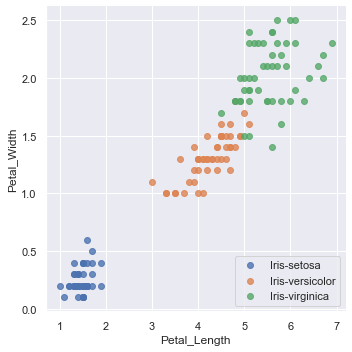

In [42]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Provide a dictionary to the palette argument
sns.lmplot( x="Petal_Length", y="Petal_Width", data=iris, fit_reg=False, hue='Species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()

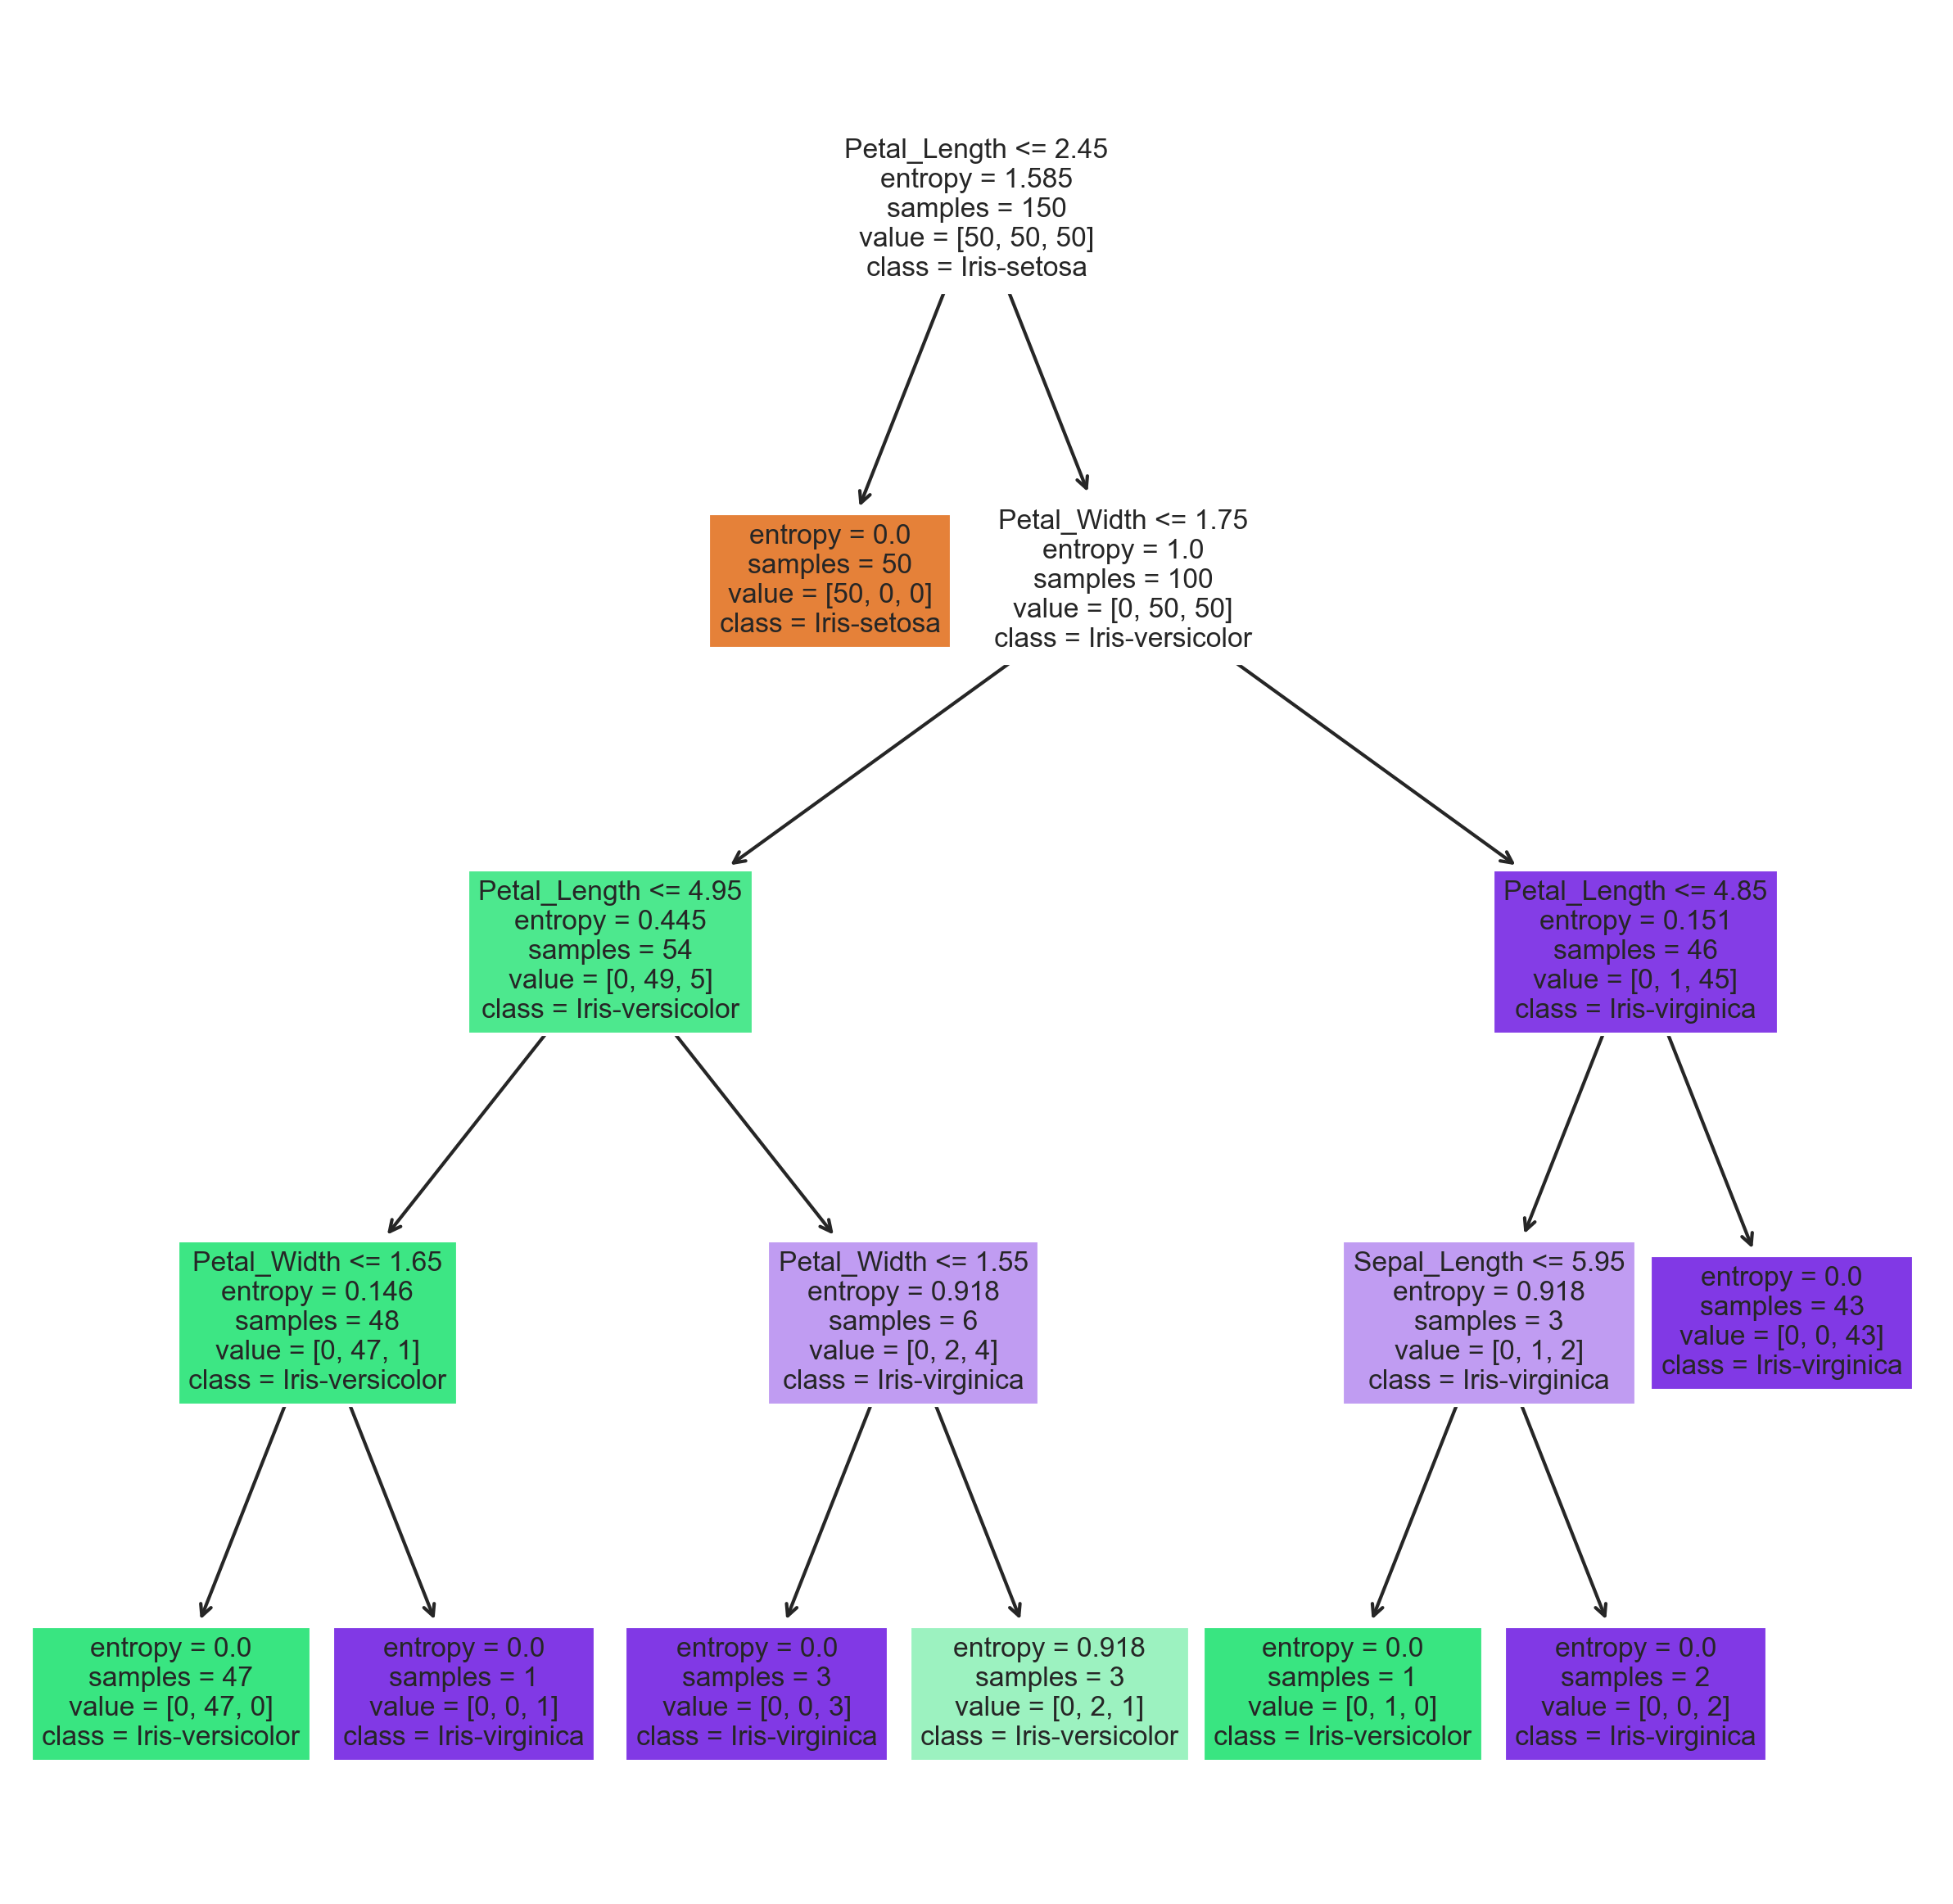

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fn = iris.columns[1:5]
cn = iris["Species"].unique().tolist()
SpeciesTree.fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi = 300)

tree.plot_tree(SpeciesTree,feature_names = fn, class_names = cn, filled = True);


# Model Selection

According to the classification report, KNN has 100% accuracy while DT has 95%. 
Similar to accuracy, the other performance matrix such as recall, precision, and F1-score are higher in KNN. Consequently, the KNN model is the champion model as it has higher performance on our dataset with no overfitting. Although, we conducted KFCV which shows that the average accuracy of KNN model is smaller than that of the DT model. 
So, the possibility that in real-life the DT performs better exists regardless of our way to select train and test subsets. Regardless of this possibility, the performance of KNN is higher on our dataset that´s why it is the champion model.


